In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split     # import module for train test split
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from pyod.models.sos import SOS
from pyod.utils.data import evaluate_print
from scipy import stats

In [2]:
df=pd.read_csv("./Invisily_Access_Logs_Data_11Sep.csv")

In [3]:
#display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,id,agent_id,client_physical_ip,client_pseudo_ip,service_id,service_physical_ip,service_pseudo_ip,client_tx_bytes,service_tx_bytes,difference_bytes,createdAt,updatedAt,log_start_time,log_end_time
0,26,7067,103.255.5.103,10.0.1.2,701,192.168.3.18,10.0.1.4,19347,52032,32685,2020-08-27 11:51:34,2020-08-27 11:51:34,1598508692,1598509007
1,32,7096,111.119.178.162,10.0.1.194,701,192.168.3.18,10.0.1.196,55508,137447,81939,2020-08-27 11:51:34,2020-08-27 11:51:34,1598509662,1598509776
2,48,7238,39.53.107.112,10.0.0.2,700,192.168.3.1,10.0.0.3,65615,505399,439784,2020-08-27 11:51:34,2020-08-27 11:51:34,1598507738,1598510917
3,74,7352,118.107.131.76,10.0.0.194,701,192.168.3.18,10.0.0.196,14768,77408,62640,2020-08-27 11:51:34,2020-08-27 11:51:34,1598510653,1598511031
4,82,7380,110.38.129.187,10.1.0.66,830,172.16.1.220,10.1.0.72,94493,116133,21640,2020-08-27 12:13:03,2020-08-27 12:13:03,1598508889,1598510156


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2592 non-null   int64 
 1   agent_id             2592 non-null   int64 
 2   client_physical_ip   2592 non-null   object
 3   client_pseudo_ip     2592 non-null   object
 4   service_id           2592 non-null   int64 
 5   service_physical_ip  2592 non-null   object
 6   service_pseudo_ip    2592 non-null   object
 7   client_tx_bytes      2592 non-null   int64 
 8   service_tx_bytes     2592 non-null   int64 
 9   difference_bytes     2592 non-null   int64 
 10  createdAt            2592 non-null   object
 11  updatedAt            2592 non-null   object
 12  log_start_time       2592 non-null   int64 
 13  log_end_time         2592 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 283.6+ KB


In [6]:
df.describe()

,id,agent_id,service_id,client_tx_bytes,service_tx_bytes,difference_bytes,log_start_time,log_end_time
count,2592.000000,2592.000000,2592.000000,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03,2.592000e+03
mean,16168.442515,7269.949846,754.902006,6.068481e+05,7.776235e+06,7.715587e+06,1.599159e+09,1.599161e+09
std,9404.633129,110.213357,51.915657,3.680620e+06,6.454868e+07,6.329439e+07,3.973094e+05,3.972351e+05
min,26.000000,7008.000000,700.000000,4.000000e+01,4.000000e+01,0.000000e+00,1.598508e+09,1.598509e+09
25%,7660.500000,7195.000000,701.000000,1.059350e+04,2.446175e+04,1.233900e+04,1.598872e+09,1.598874e+09
50%,16302.500000,7297.000000,737.000000,3.280900e+04,1.187265e+05,6.285950e+04,1.599111e+09,1.599114e+09
75%,24262.500000,7367.000000,800.000000,1.511288e+05,6.662490e+05,5.406798e+05,1.599545e+09,1.599547e+09
max,32311.000000,7405.000000,841.000000,1.068441e+08,1.448077e+09,1.419875e+09,1.599833e+09,1.599833e+09


In [7]:
df.dtypes

id                      int64
agent_id                int64
client_physical_ip     object
client_pseudo_ip       object
service_id              int64
service_physical_ip    object
service_pseudo_ip      object
client_tx_bytes         int64
service_tx_bytes        int64
difference_bytes        int64
createdAt              object
updatedAt              object
log_start_time          int64
log_end_time            int64
dtype: object

In [8]:
df.groupby('agent_id').count()

,id,client_physical_ip,client_pseudo_ip,service_id,service_physical_ip,service_pseudo_ip,client_tx_bytes,service_tx_bytes,difference_bytes,createdAt,updatedAt,log_start_time,log_end_time
agent_id,,,,,,,,,,,,,
7008,8,8,8,8,8,8,8,8,8,8,8,8,8
7014,5,5,5,5,5,5,5,5,5,5,5,5,5
7026,23,23,23,23,23,23,23,23,23,23,23,23,23
7032,3,3,3,3,3,3,3,3,3,3,3,3,3
7039,18,18,18,18,18,18,18,18,18,18,18,18,18
7048,130,130,130,130,130,130,130,130,130,130,130,130,130
7056,1,1,1,1,1,1,1,1,1,1,1,1,1
7067,29,29,29,29,29,29,29,29,29,29,29,29,29
7072,5,5,5,5,5,5,5,5,5,5,5,5,5


In [9]:
def select_agent(df, agent_id):
    df_selected = df.loc[df['agent_id'] == agent_id]
    return df_selected

In [10]:
def show_unique_service_ids(df, agent_id):
    df_agent_selected = select_agent(df, agent_id)
    service_ids = df_agent_selected.groupby('service_id')['service_id'].first()
    print(service_ids)


In [11]:


def select_service(df,service_id):
    df_selected = df.loc[df['service_id'] == service_id]
    return df_selected



In [12]:


def select_features(df, feature_list):
    df_selected = df[feature_list]
    return df_selected



In [13]:
features = ['difference_bytes']

In [14]:
def normalize_data(df):
    
    """ Method for normalizing data using zscore
    
    Args:
        df (dataframe)
        
    Attributes:
        df (dataframe): original dataframe with selected rows and columns
        X (dataframe): consists of copy of df for processing
    
    Returns:
        X(dataframe): Normalized dataframe
        
    """
    
    X = df
    for col in X:
        X[col] = stats.zscore(X[col])
        
    return X

In [15]:
def outlier_detection_sos(df,contamination, service_name, agent_id, df_created_at):

    clf_name = 'SOS'
    clf = SOS(contamination=contamination)
    
    clf.fit(df)
    y_test_pred = clf.predict(df)    
    y_pred = clf.fit_predict(df)
    
    F = plt.gcf()
    Size = F.get_size_inches()
    F.set_size_inches(Size[0]*3.5, Size[1]*2.5, forward=True) 
    
    print("Predicted Values " , y_test_pred)
    cluster = []
    outliers = []
    
    for i in range(len(df)):
        if y_test_pred[i] == 0:
            cluster.append((df.iloc[i],df_created_at.iloc[i]))
        elif y_test_pred[i] == 1:
            outliers.append((df.iloc[i], df_created_at.iloc[i]))
            
            

    if len(cluster) > 0:
        x = []
        y = []
        for i in range(len(cluster)):
            x.append(cluster[i][1])
            y.append(cluster[i][0]) # append labels 
            
        plt.scatter(x, y,c='b', cmap='Paired')
        print("Number of inliers : ", len(cluster))
        
        
    
    if len(outliers) > 0:    
        # outliers
        x = []
        y = []
        for i in range(len(outliers)):
            x.append(outliers[i][1])
            y.append(outliers[i][0])
        plt.scatter(x, y,c='r', marker = '*', cmap='Paired') #outlier
        print("Number of outliers : ", len(outliers))
        
    X = df    
    try:        
        silhouette_value = silhouette_score(X,y_pred)
        print("Silhouette Score : ", silhouette_value)
    except:
        print("Silhouette needs more than one custer to be calculated")
        
    
    try:        
        davies_bouldin_score_value = davies_bouldin_score(X,y_pred)
        print("Davies Bouldin Score : ", davies_bouldin_score_value)
    except:
        print("Davies Bouldin Score needs more than one custer to be calculated")
        
        
    plot_title = "Agent ID : " + str(agent_id) + " Service ID : " + str(service_id) + " Service Name : " + service_name 
    plt.title(plot_title)
    plt.ylabel("Difference Bytes")
    plt.xlabel("Created At")
    plt.gcf().autofmt_xdate()


In [16]:
def sos_workflow(df, agent_id, service_id, feature_list, contamination):
    
    """ Method implementing the whole pipleline of work work dbscan
    
    Args:
        df (dataframe): unprocessed data
        epsilon (float): The maximum distance between two samples for one to be 
                    considered as in the neighborhood of the other
        min_samples (int):The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
                        This includes the point itself
        features (list): names of features needed
        
    Returns: None
        
    """ 
    if agent_id == "all" or agent_id == "All" or agent_id == "ALL" or agent_id == "any" or agent_id == "Any":
        pass
    else:
        df = select_agent(df, agent_id) # select dataframe for selected agent
    df = select_service(df,service_id)
    df_created_at = df['createdAt']
    df = select_features(df, feature_list)
    df = normalize_data(df)
    if service_id == 700:
        service_name = "Redmine"
    elif service_id == 701:
        service_name = "Attendance"
    elif service_id == 702:
        service_name = "GitLab"
    else:
        service_name = "Not specified"

    #     outlier_detection_dbscan(epsilon, min_samples, df, df_created_at, service_name, agent_id)
    outlier_detection_sos(df,contamination, service_name, agent_id, df_created_at)

    
    
#     df = filter_ip(df)
#     df = select_features(df,features)
#     df = normalize_data(df)
#     outlier_detection_dbscan(epsilon, min_samples, df)

/home/ebryx/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Predicted Values  [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of inliers :  93
Number of outliers :  10
Silhouette Score :  -0.02563024715785826
Davies Bouldin Score :  25.859660528072553


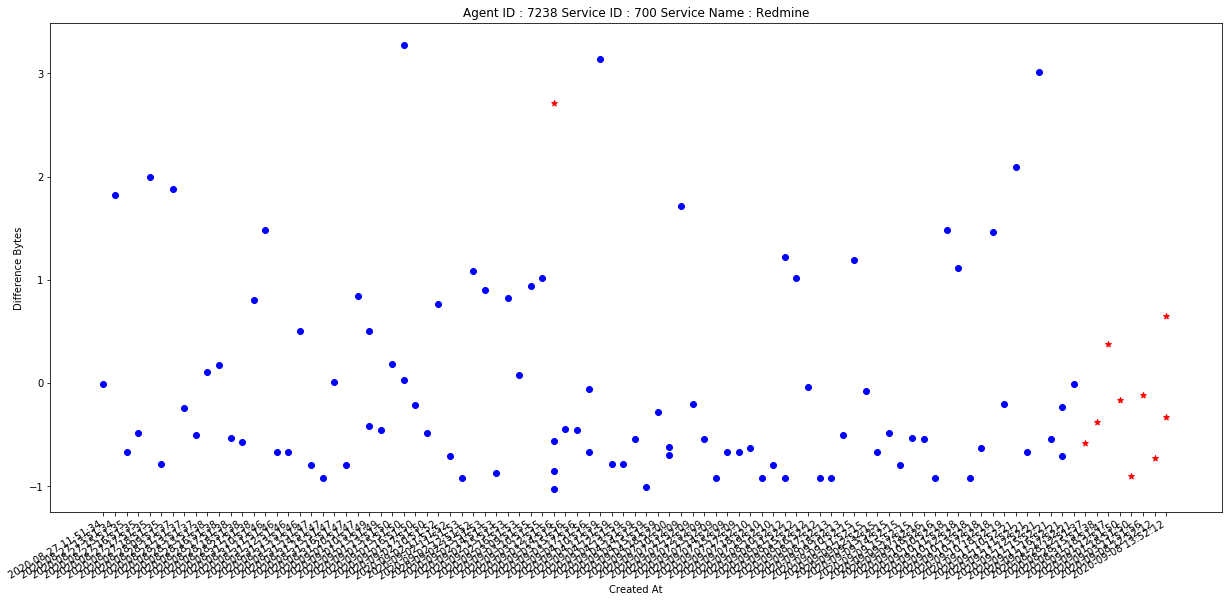

In [17]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.09
sos_workflow(df, agent_id, service_id, feature_list, contamination)





/home/ebryx/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Predicted Values  [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of inliers :  92
Number of outliers :  11
Silhouette Score :  -0.04442421954908817
Davies Bouldin Score :  36.98439744218137


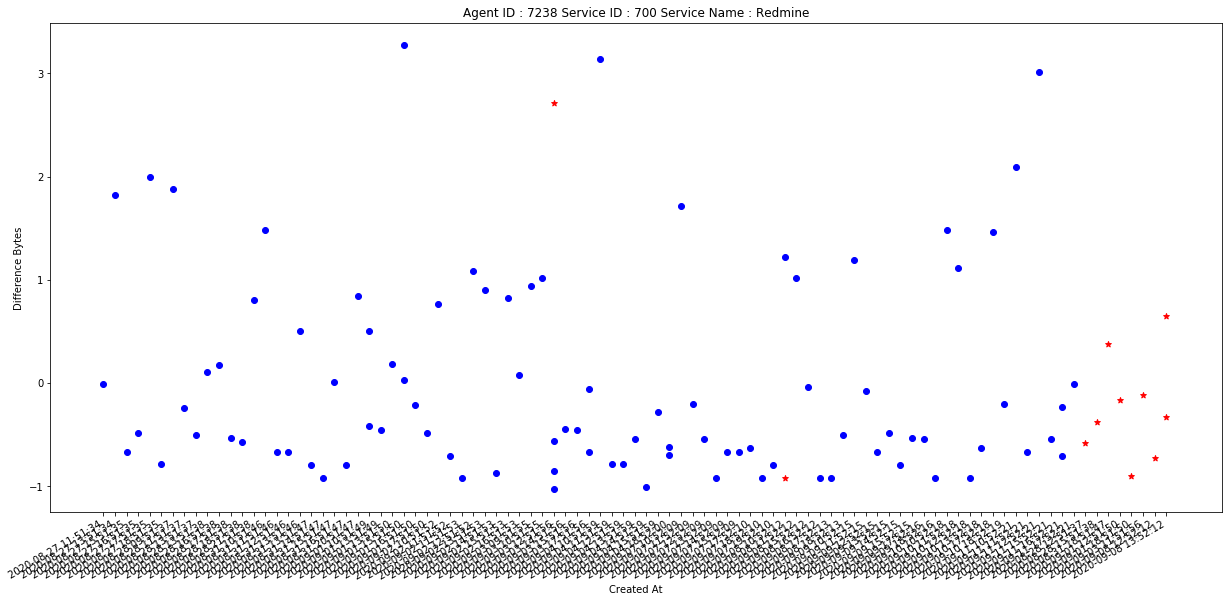

In [18]:


agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.1
sos_workflow(df, agent_id, service_id, feature_list, contamination)



/home/ebryx/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Predicted Values  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of inliers :  101
Number of outliers :  2
Silhouette Score :  -0.31304729043266155
Davies Bouldin Score :  1.0546967275855923


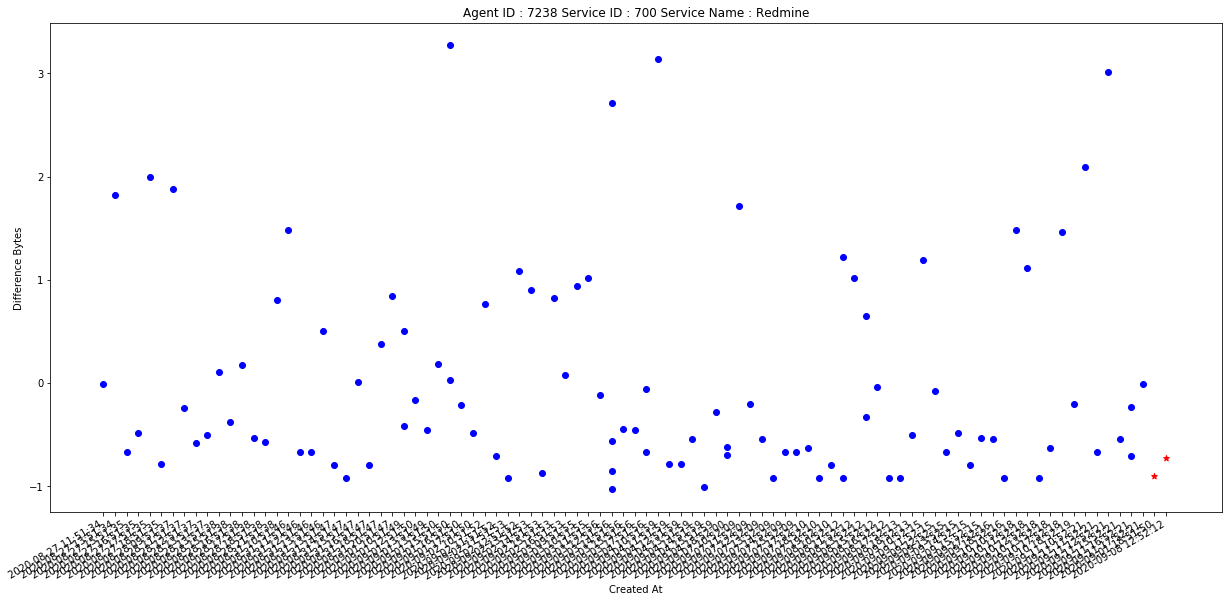

In [19]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.01
sos_workflow(df, agent_id, service_id, feature_list, contamination)


/home/ebryx/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Predicted Values  [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
Number of inliers :  87
Number of outliers :  16
Silhouette Score :  -0.03239819354172914
Davies Bouldin Score :  21.901758082884815


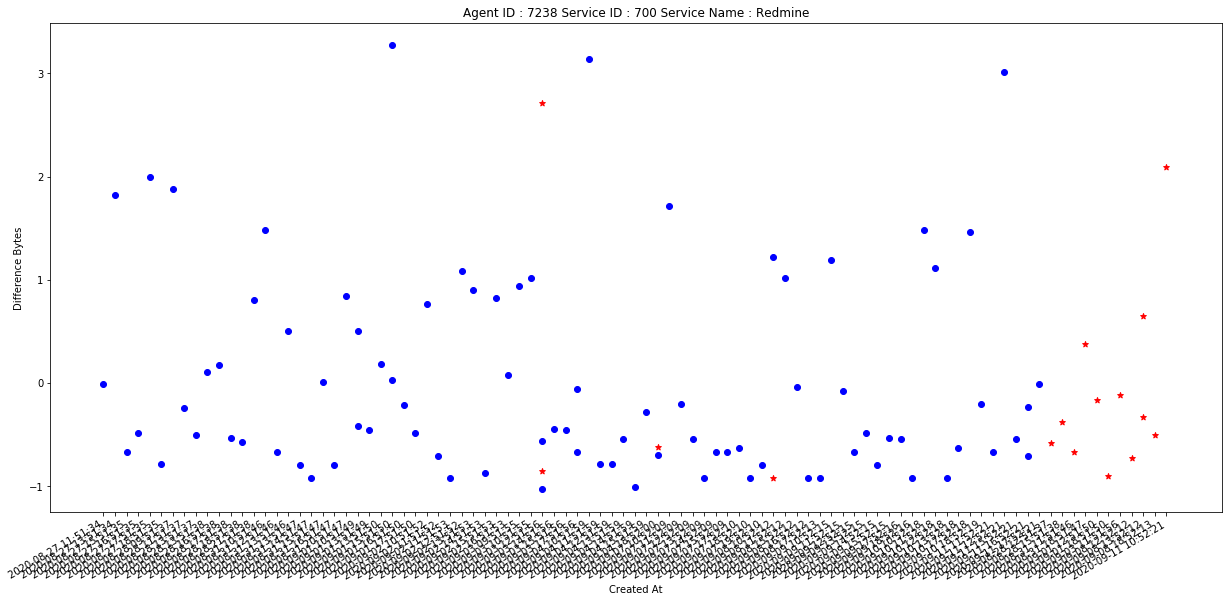

In [20]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.15
sos_workflow(df, agent_id, service_id, feature_list, contamination)


/home/ebryx/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Predicted Values  [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
Number of inliers :  82
Number of outliers :  21
Silhouette Score :  -0.035563188871597595
Davies Bouldin Score :  32.28609063527466


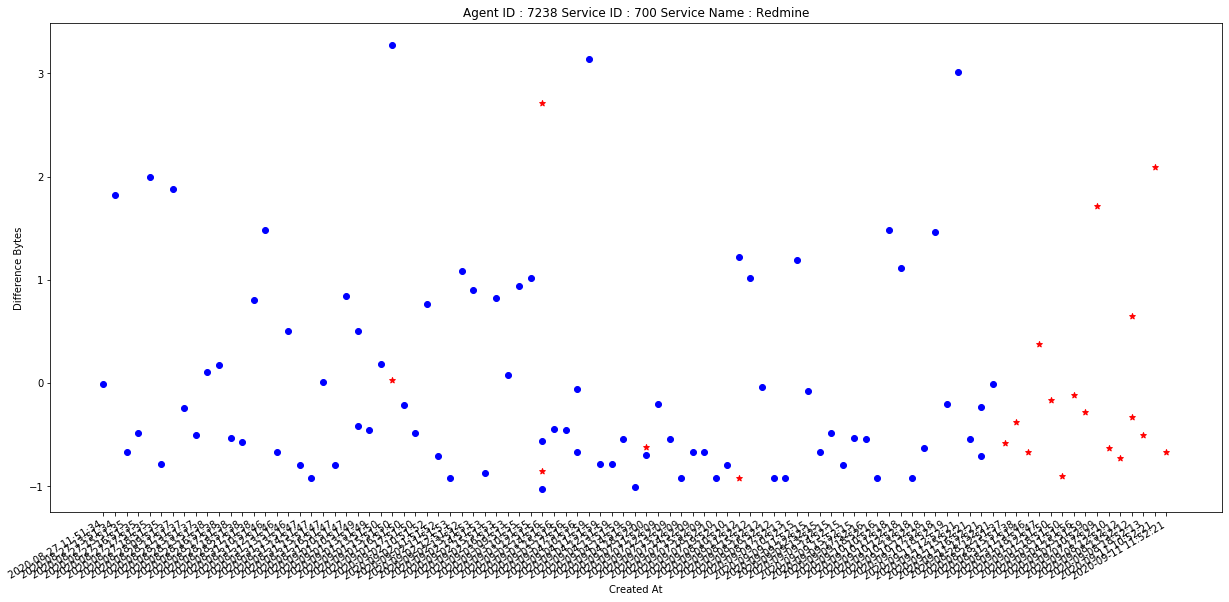

In [21]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.2
sos_workflow(df, agent_id, service_id, feature_list, contamination)


/home/ebryx/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Predicted Values  [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of inliers :  56
Number of outliers :  6
Silhouette Score :  0.27856307048692525
Davies Bouldin Score :  5.695167747180772


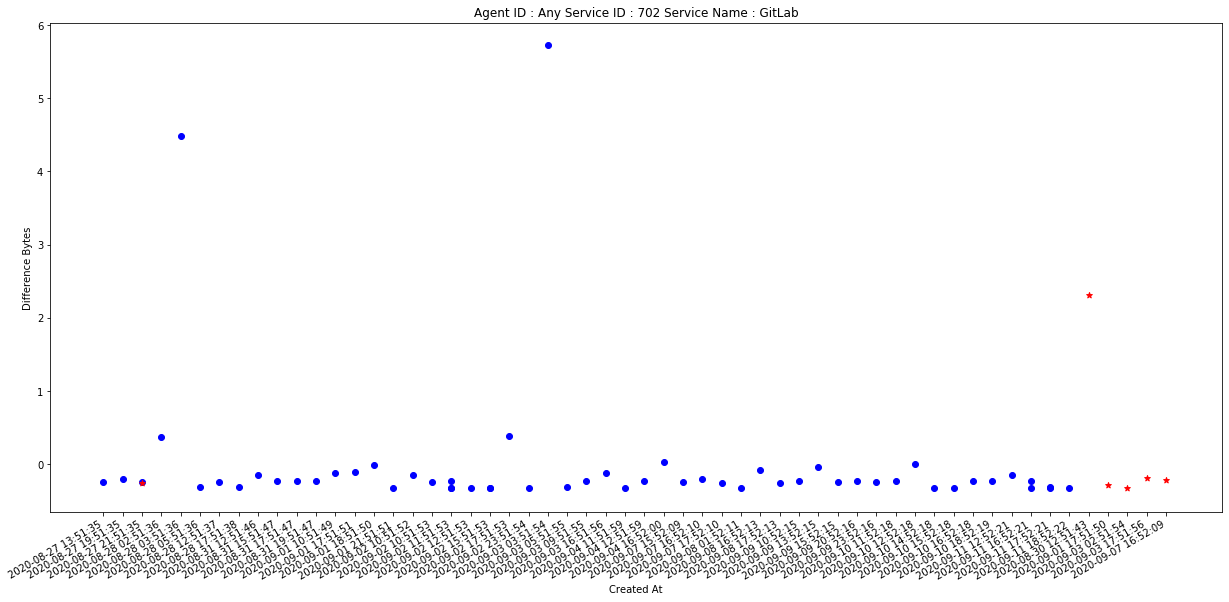

In [22]:


agent_id = "Any"
service_id = 702
feature_list = ['difference_bytes']
contamination = 0.09
sos_workflow(df, agent_id, service_id, feature_list, contamination)



/home/ebryx/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Predicted Values  [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0]
Number of inliers :  72
Number of outliers :  31
Silhouette Score :  0.0023559739354766115
Davies Bouldin Score :  22.198145539472474


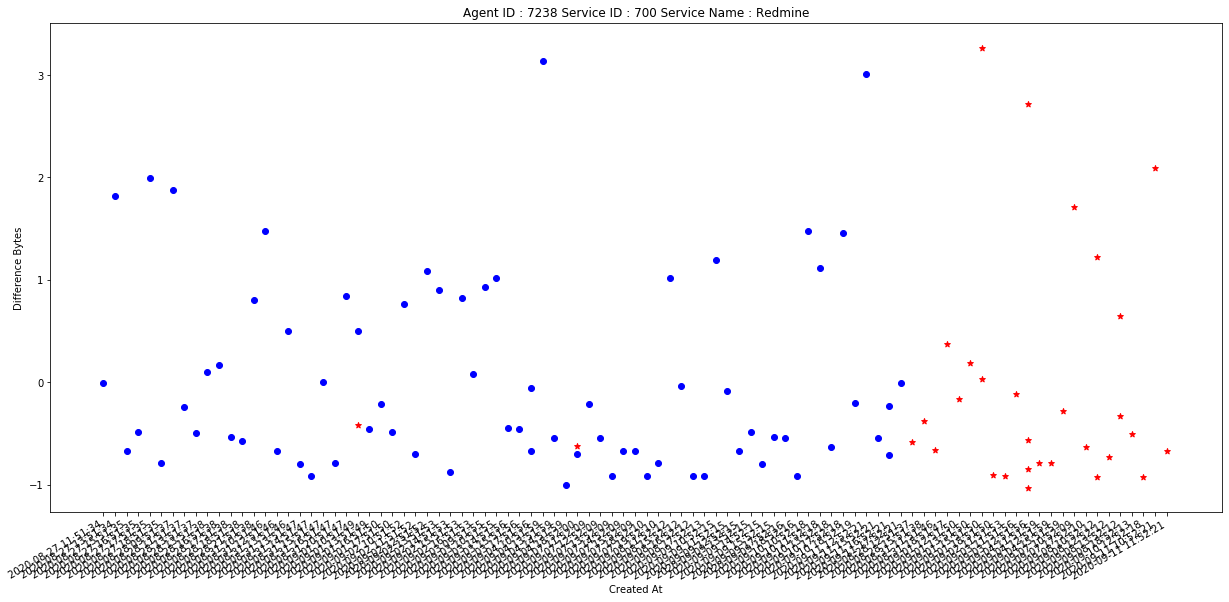

In [23]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.3
sos_workflow(df, agent_id, service_id, feature_list, contamination)


/home/ebryx/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Predicted Values  [0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0]
Number of inliers :  62
Number of outliers :  41
Silhouette Score :  -0.009167990215433448
Davies Bouldin Score :  11.185743884037201


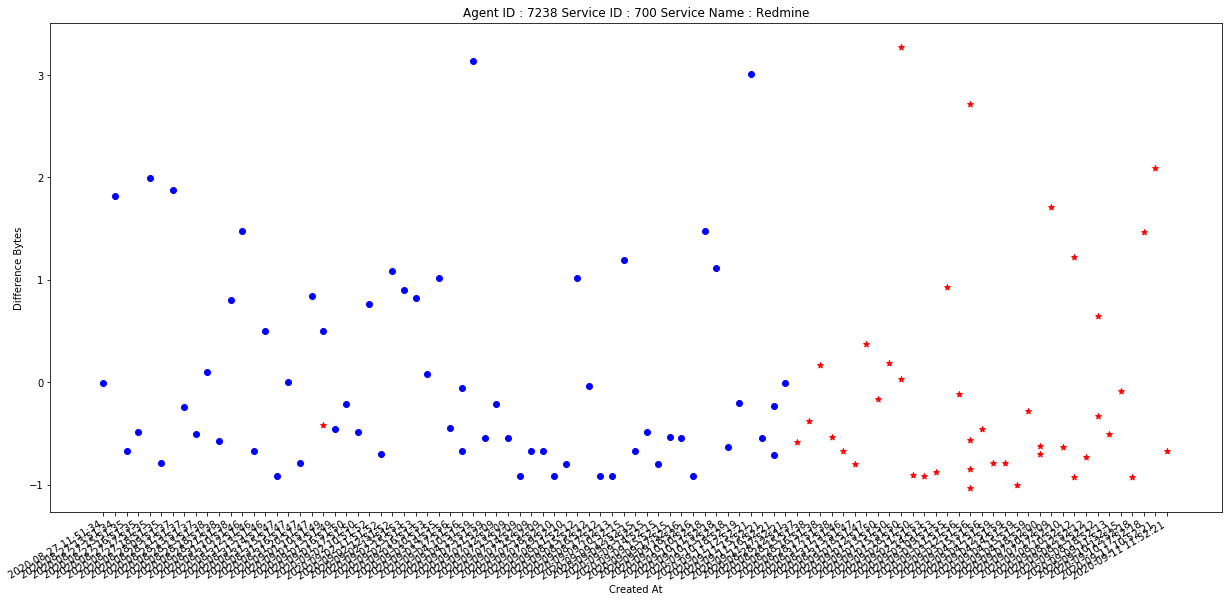

In [24]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.4
sos_workflow(df, agent_id, service_id, feature_list, contamination)


/home/ebryx/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Predicted Values  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of inliers :  97
Number of outliers :  6
Silhouette Score :  -0.21169306767053786
Davies Bouldin Score :  4.858226442685908


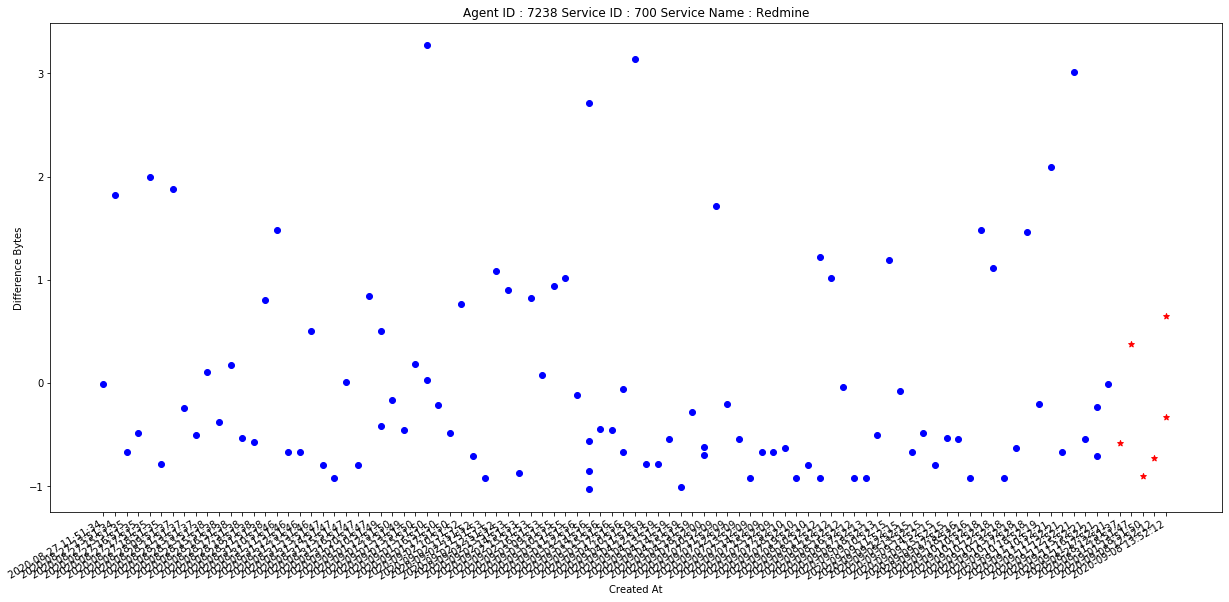

In [25]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.05
sos_workflow(df, agent_id, service_id, feature_list, contamination)


In [26]:
show_unique_service_ids(df, 7238)

service_id
700    700
701    701
706    706
721    721
725    725
741    741
770    770
799    799
800    800
801    801
809    809
818    818
820    820
834    834
838    838
Name: service_id, dtype: int64


/home/ebryx/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Predicted Values  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0]
Number of inliers :  36
Number of outliers :  2
Silhouette Score :  -0.0010285868737874117
Davies Bouldin Score :  9.683459959589312


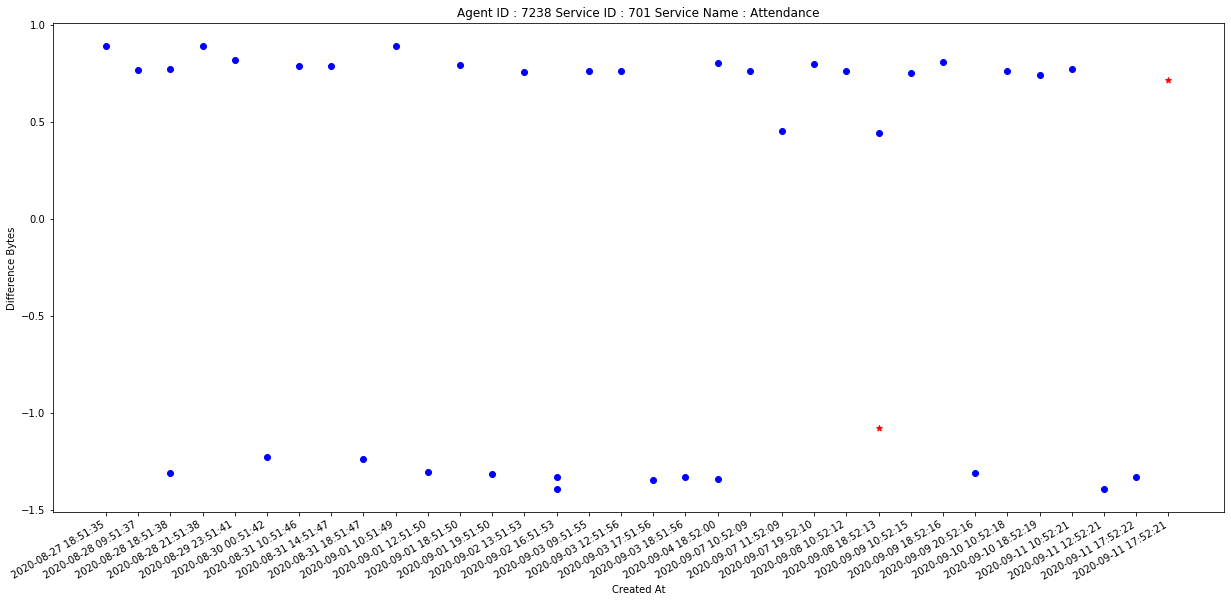

In [27]:
agent_id = 7238
service_id = 701
feature_list = ['difference_bytes']
contamination = 0.05
sos_workflow(df, agent_id, service_id, feature_list, contamination)